<a href="https://colab.research.google.com/github/TechJonesAi/ImageAi/blob/master/Copy_of_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INITIATE RUNTIME GPU**

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_drive = "/content/gdrive/My Drive/"
base_drive = root_drive + 'Flowers'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from fastai.vision import *

**RUN ONE BY ONE RUN GOLD FISH FIRST, THEN RUN PATH = PATH('/CONTENT/GDRIVE.... THEN RUN DOWNLOAD_IMAGES(PATH/FILE..... REPEAT PROCESS**

In [0]:
folder = 'Aconitum'
file = 'Aconitum.txt'

In [0]:
folder = 'Daffodil'
file = 'Daffodil.txt'

In [0]:
folder = 'Hibiscus'
file = 'Hibiscus.txt'

In [0]:
folder = 'Roses'
file = 'Roses.txt'

In [0]:
path = Path('//content/gdrive/My Drive/Colab Notebooks/Flowers')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [0]:
classes = ['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

In [0]:
download_images(path/file, dest, max_pics=200)

In [0]:
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

**REMOVE IMAGES THAT CAN'T OPEN OR CORRUPT**

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [21]:
data.classes

['Aconitum', 'Daffodil', 'Hibiscus', 'Roses']

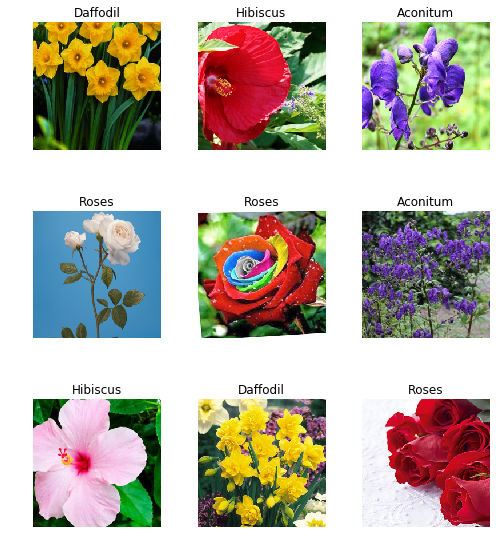

In [22]:
data.show_batch(rows=3, figsize=(7,8))

**VIsually Check Images**

In [23]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Aconitum', 'Daffodil', 'Hibiscus', 'Roses'], 4, 611, 152)

**TRAIN MODEL**

In [24]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 88663084.28it/s]


In [25]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.176751,0.352222,0.138158,00:42
1,0.654458,0.131615,0.046053,00:40
2,0.430768,0.103651,0.046053,00:39
3,0.315929,0.104860,0.046053,00:39


In [0]:
learn.save('stage-1')

In [27]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.099203,0.096916,0.039474,00:40
1,0.081586,0.095148,0.039474,00:40


In [0]:
learn.save('stage-2')

In [29]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.082830,0.094320,0.046053,00:40
1,0.071779,0.094663,0.046053,00:39


In [0]:
learn.save('stage-2')

In [0]:
learn.unfreeze()

In [32]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


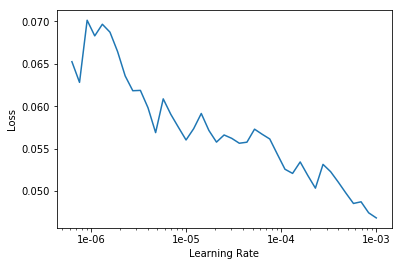

In [33]:
learn.recorder.plot()

In [34]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.061452,0.085342,0.032895,00:40
1,0.057452,0.092012,0.046053,00:40


In [0]:
learn.save('stage-3')

In [36]:
learn.fit_one_cycle(2, max_lr=slice(3e-5, 3e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.024584,0.055417,0.026316,00:40
1,0.021803,0.049844,0.013158,00:41


**THAT LOOKS BETTER.... TRAINING ALL DONE**

In [0]:
learn.save('stage-4')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

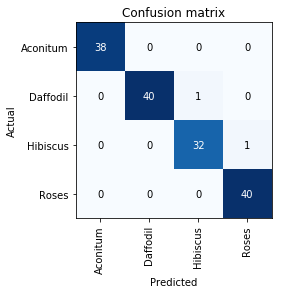

In [40]:
interp.plot_confusion_matrix()

**PREPARE FOR EXPORT**

In [0]:
learn.export()